<a href="https://www.kaggle.com/code/samithsachidanandan/bangladressnet-cnn-improving?scriptVersionId=285270070" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>



Acknowledgements:
[Marília Prata](https://www.kaggle.com/code/mpwolke/bangladressnet-cnn)

Published on December 08, 2025. By Prata, Marília (mpwolke)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Two lines Required to Plot Plotly
import plotly.io as pio
pio.renderers.default = 'iframe'

import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bangladressnet/BanglaDressNet_Dataset/val/Petticoat/Petticoat (286).jpg
/kaggle/input/bangladressnet/BanglaDressNet_Dataset/val/Petticoat/Petticoat (359).jpg
/kaggle/input/bangladressnet/BanglaDressNet_Dataset/val/Petticoat/Petticoat (173).jpg
/kaggle/input/bangladressnet/BanglaDressNet_Dataset/val/Petticoat/Petticoat (330).jpg
/kaggle/input/bangladressnet/BanglaDressNet_Dataset/val/Petticoat/Petticoat (146).jpg
/kaggle/input/bangladressnet/BanglaDressNet_Dataset/val/Petticoat/Petticoat (183).jpg
/kaggle/input/bangladressnet/BanglaDressNet_Dataset/val/Petticoat/Petticoat (184).jpg
/kaggle/input/bangladressnet/BanglaDressNet_Dataset/val/Petticoat/Petticoat (299).jpg
/kaggle/input/bangladressnet/BanglaDressNet_Dataset/val/Petticoat/Petticoat (180).jpg
/kaggle/input/bangladressnet/BanglaDressNet_Dataset/val/Petticoat/Petticoat (195).jpg
/kaggle/input/bangladressnet/BanglaDressNet_Dataset/val/Petticoat/Petticoat (142).jpg
/kaggle/input/bangladressnet/BanglaDressNet_Dataset/va

## Import Libraries

In [2]:
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.validation import check_consistent_length  # Import missing function
from tensorflow.keras.regularizers import l2

2025-12-10 17:19:59.289457: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765387199.520151      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765387199.582965      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [3]:
#By Bisma Ali https://www.kaggle.com/code/bismahali/karachi-transport-dataset-eda-ida

import cv2

# Dataset Path
dataset_path = "/kaggle/input/bangladressnet/BanglaDressNet_Dataset/train" 

# Show folders/classes
classes = os.listdir(dataset_path)

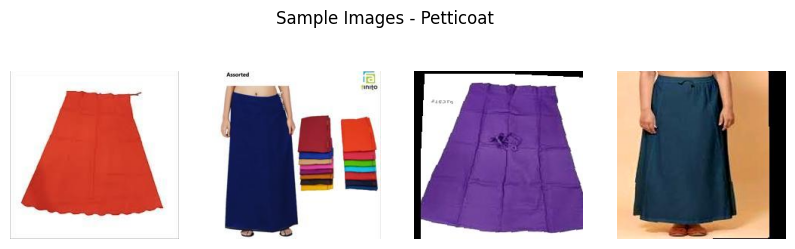

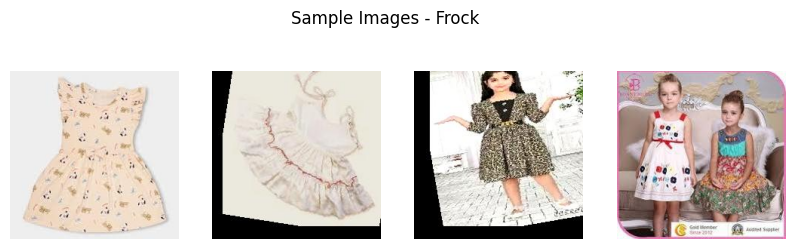

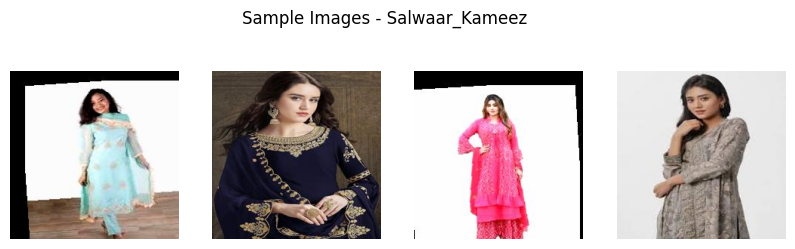

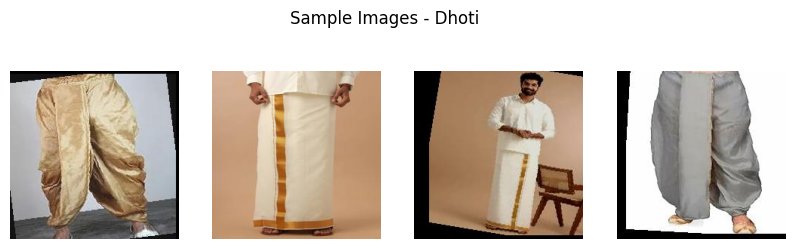

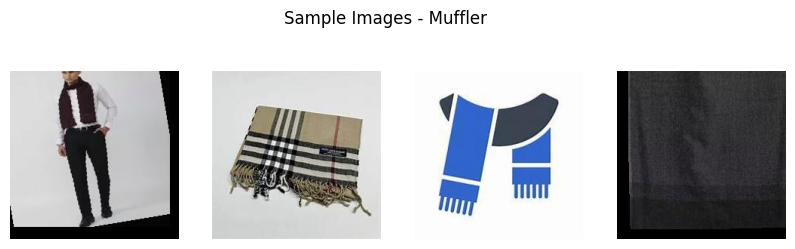

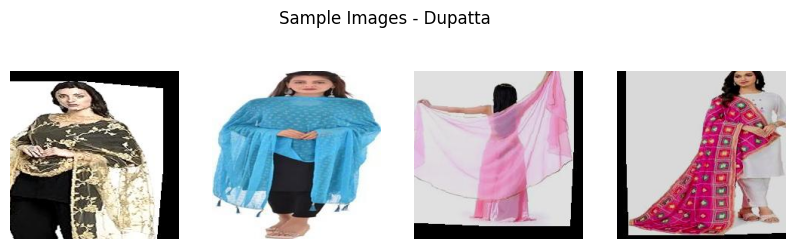

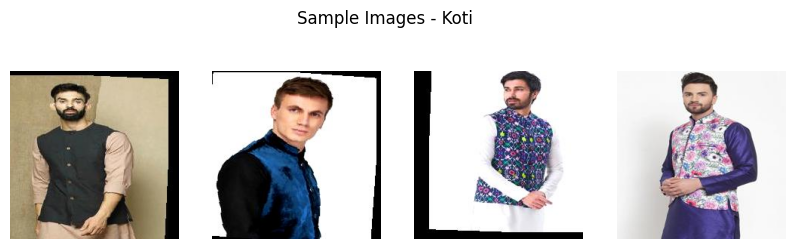

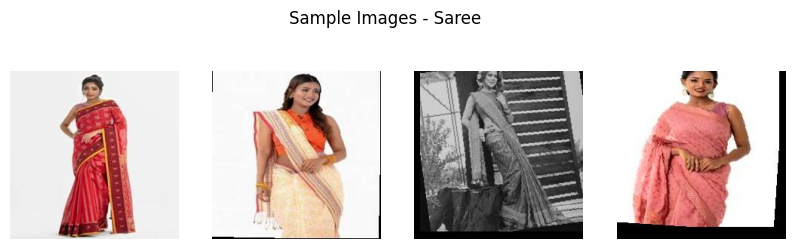

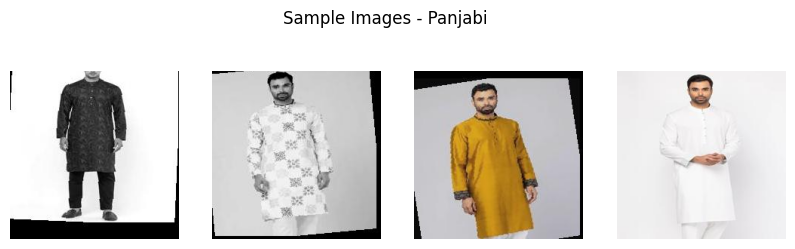

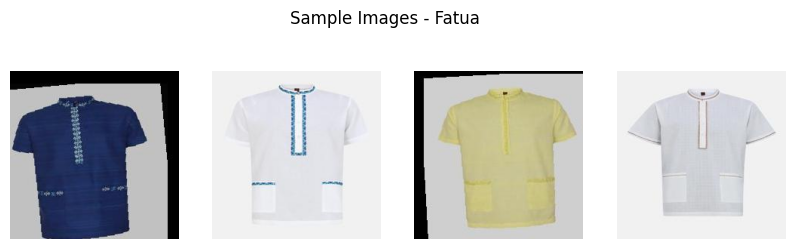

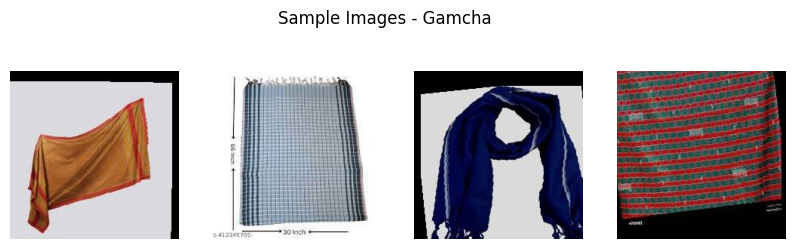

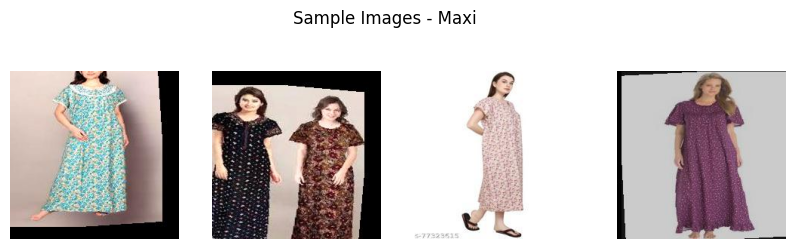

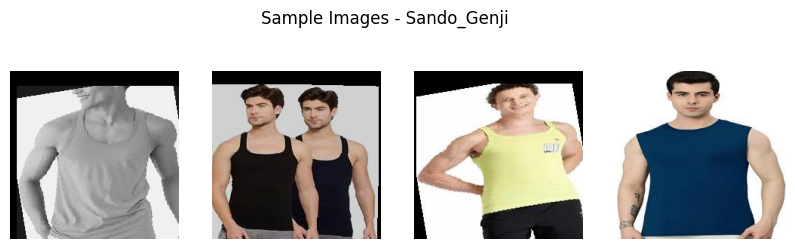

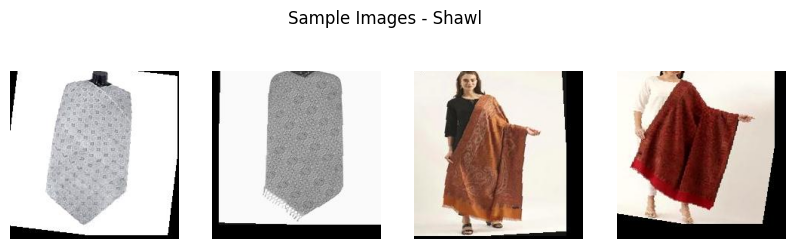

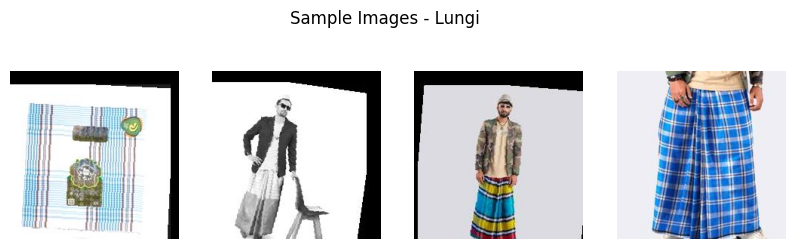

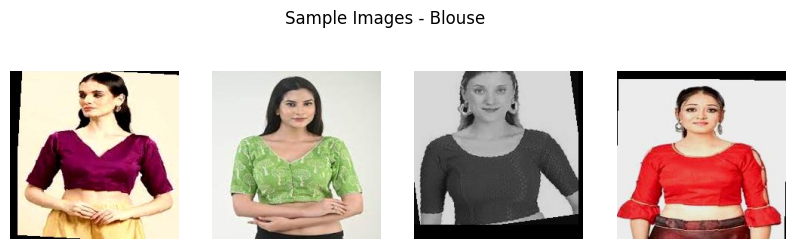

In [4]:
#By Bisma Ali https://www.kaggle.com/code/bismahali/karachi-transport-dataset-eda-ida

def show_samples(n=16): #Original 4, we have 16 classes
    for cls in classes:
        folder = os.path.join(dataset_path, cls)
        imgs = os.listdir(folder)[:n]

        plt.figure(figsize=(10,3))
        plt.suptitle(f"Sample Images - {cls}")

        for i, img_name in enumerate(imgs):
            img_path = os.path.join(folder, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(1, n, i+1)
            plt.imshow(img)
            plt.axis("off")

        plt.show()

show_samples(4) #number of images per row

In [5]:
# Define the paths to the datasets
train_dir = '/kaggle/input/bangladressnet/BanglaDressNet_Dataset/train'
test_dir = '/kaggle/input/bangladressnet/BanglaDressNet_Dataset/test'
valid_dir = '/kaggle/input/bangladressnet/BanglaDressNet_Dataset/val'

In [6]:
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [7]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

## Class_mode

https://stackoverflow.com/questions/62090714/confused-between-whether-or-not-to-change-the-class-mode-from-binary-to-categori

"So you should use categorical_crossentropy as loss function if you choose categorical for class_mode, and sparse_categorical_crossentropy if you choose sparse."

"Of course, you should change it. If you have only 2 classes use **class_mode='binary**' in flow_from_directory function and binary_crossentropy as loss. In case you have more than 2 classes, use **class_mode='categorical**' and categorical_crossentropy"

### ImageDataGenerators for data augmentation

In [8]:
#By Anthony Therrien https://www.kaggle.com/code/anthonytherrien/dog-vs-cat-trainer/notebook

img_height = 150
img_width = 150
batch_size = 32

# Create ImageDataGenerators for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # 'binary' because we have two classes
    seed=seed_value
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    seed=seed_value,
    shuffle=False  # Important: Don't shuffle validation data for confusion matrix
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    seed=seed_value,
    shuffle=False # Important: Don't shuffle test data for confusion matrix/report
)

Found 5600 images belonging to 16 classes.
Found 1200 images belonging to 16 classes.
Found 1200 images belonging to 16 classes.


## CNN model

Attention to Dense, number of classes.

In [9]:
#By Anthony Therrien https://www.kaggle.com/code/anthonytherrien/dog-vs-cat-trainer/notebook

def create_cnn_model(img_height, img_width, num_classes=16):
    model = Sequential([
        # Block 1
        Conv2D(32, (3, 3), activation='relu', padding='same', 
               input_shape=(img_height, img_width, 3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        # Block 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        # Block 3
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        # Classification head
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

## Model Summary

In [10]:
model = create_cnn_model(img_height, img_width)
model.summary()

I0000 00:00:1765387219.160939      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1765387219.161648      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │             

 Total params: 326,960 (1.25 MB)

 Trainable params: 325,552 (1.24 MB)

 Non-trainable params: 1,408 (5.50 KB)

## Epochs

In [11]:
#By Anthony Therrien https://www.kaggle.com/code/anthonytherrien/dog-vs-cat-trainer/notebook

epochs = 100  # You can adjust the number of epochs

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [12]:
#By Anthony Therrien https://www.kaggle.com/code/anthonytherrien/dog-vs-cat-trainer/notebook

# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

## Epochs No GPU

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100


I0000 00:00:1765387226.005568     133 service.cc:148] XLA service 0x7b875c008fe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765387226.006701     133 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1765387226.006722     133 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1765387226.751324     133 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/175 ━━━━━━━━━━━━━━━━━━━━ 14s 85ms/step - accuracy: 0.0312 - loss: 3.7495     

I0000 00:00:1765387236.876398     133 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


175/175 ━━━━━━━━━━━━━━━━━━━━ 88s 414ms/step - accuracy: 0.1084 - loss: 3.4000 - val_accuracy: 0.0600 - val_loss: 3.1629 - learning_rate: 0.0010
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 34s 192ms/step - accuracy: 0.1637 - loss: 2.8831 - val_accuracy: 0.1132 - val_loss: 3.5274 - learning_rate: 0.0010
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 34s 195ms/step - accuracy: 0.2186 - loss: 2.5995 - val_accuracy: 0.2111 - val_loss: 2.4301 - learning_rate: 0.0010
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 34s 194ms/step - accuracy: 0.2661 - loss: 2.3731 - val_accuracy: 0.1199 - val_loss: 3.1867 - learning_rate: 0.0010
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 33s 190ms/step - accuracy: 0.3060 - loss: 2.1847 - val_accuracy: 0.0980 - val_loss: 3.7189 - learning_rate: 0.0010
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 34s 192ms/step - accuracy: 0.3435 - loss: 2.0670 - val_accuracy: 0.1073 - val_loss: 3.7645 - learning_rate: 0.0010
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 34s 196ms/step - accuracy: 0.3989 -

In [14]:
def plot_training_history(history):
    """Plots the training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

## Plot Accuracy and Loss

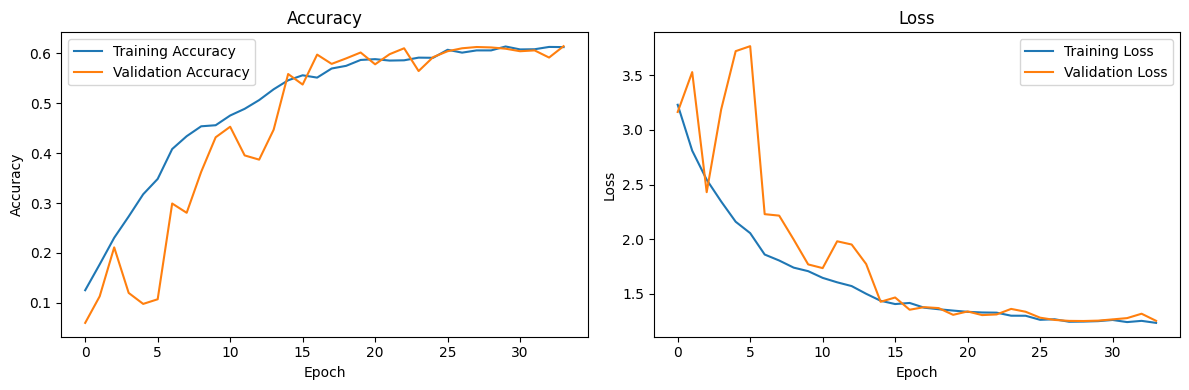

In [15]:
plot_training_history(history)

## Evaluate the Model

In [16]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6217 - loss: 1.3052
Test Loss: 1.2525
Test Accuracy: 0.6115


## Classification Metrics Can NOT handle Mix of Multiclass

Error Classification metrics can't handle a mix of multiclass and multilabel-indicator targets for model

Answered on Kaggle by Giorgios F:

"Using model.predict(X_test) you get your predictions in the shape of (n_samples, 7) having probabilities for your seven classes. You have to use either

a) arg_max afterwards to get your selected class like pred_test = model.predict(X_test) pred_test=np.argmax(pred_test, axis=1) or

b) change to pred_test = model.predict_classes(X_test). Then you can use your predictions (pred_test) to calculate accuracy_score.

I used the 1st one below. Next, I commented the 2 lines from Therrien's code (last snippet).

https://www.kaggle.com/discussions/questions-and-answers/182403

In [17]:
#https://www.kaggle.com/discussions/questions-and-answers/182403

preds = model.predict(test_generator)
preds=np.argmax(preds, axis=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step


In [18]:
#Error
# Make predictions on the test set
# Correctly predict on the entire test set
predictions = model.predict(test_generator, steps=int(np.ceil(test_generator.samples / batch_size)))
predicted_classes = (predictions > 0.5).astype("int32")  # Convert probabilities to binary classes

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step


In [19]:
# Evaluate on validation set
#val_gen.reset()
#preds = (model.predict(val_gen) > 0.5).astype(int)
print(classification_report(test_generator.classes, preds, target_names=['Blouse','Dhoti', 'Dupatta', 'Fatua','Frock','Gamcha', 'Koti', 'Lungi','Maxi','Muffler', 'Panjabi', 'Petticoat','Salwaar_Kameez','Sando_Genji', 'Saree', 'Shawl']))

                precision    recall  f1-score   support

        Blouse       0.74      0.69      0.72        75
         Dhoti       0.60      0.73      0.66        75
       Dupatta       0.65      0.32      0.43        75
         Fatua       0.77      0.77      0.77        75
         Frock       0.54      0.36      0.43        75
        Gamcha       0.48      0.76      0.59        75
          Koti       0.74      0.61      0.67        75
         Lungi       0.82      0.81      0.82        75
          Maxi       0.47      0.40      0.43        75
       Muffler       0.60      0.28      0.38        75
       Panjabi       0.63      1.00      0.77        75
     Petticoat       0.78      0.48      0.60        75
Salwaar_Kameez       0.27      0.33      0.30        75
   Sando_Genji       0.97      0.96      0.97        75
         Saree       0.36      0.51      0.42        75
         Shawl       0.67      0.79      0.72        75

      accuracy                           0.61 

In [20]:
# Generate classification report???
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [21]:
# Ensure lengths are consistent before generating the classification report and confusion matrix
# This is the crucial fix: truncate the predictions to match the true classes
predicted_classes = predicted_classes[:len(true_classes)]
predicted_classes=np.argmax(predicted_classes, axis=1)

In [22]:
# Plot confusion matrix
def plot_confusion_matrix(true_classes, predicted_classes, class_labels):
    """Plots the confusion matrix."""
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

## What happened here?

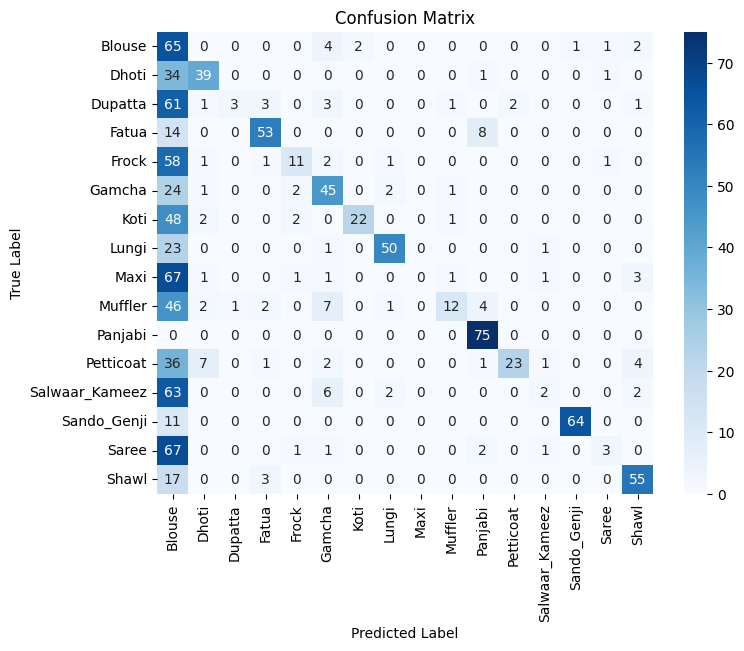

In [23]:
plot_confusion_matrix(true_classes, predicted_classes, class_labels)

In [24]:
# Create a pandas DataFrame for results
results_df = pd.DataFrame({
    'Filename': test_generator.filenames,
    'True Class': [class_labels[i] for i in test_generator.classes],
    'Predicted Probability': predictions.flatten()[:len(true_classes)],  # Truncate here as well
    'Predicted Class': [class_labels[i] for i in predicted_classes.flatten()]
})

print("\nResults DataFrame:")
print(results_df.head())


Results DataFrame:
                   Filename True Class  Predicted Probability Predicted Class
0     Blouse/Blouse (1).jpg     Blouse               0.983957          Blouse
1  Blouse/Blouse (108).jpeg     Blouse               0.000003          Blouse
2   Blouse/Blouse (11).jpeg     Blouse               0.000074          Blouse
3  Blouse/Blouse (113).jpeg     Blouse               0.000001          Blouse
4  Blouse/Blouse (118).jpeg     Blouse               0.003954          Blouse


In [25]:
def visualize_predictions(generator, model, num_images=5):
    """Visualizes predictions on a few sample images from the generator."""
    image_files = generator.filenames
    sample_indices = random.sample(range(len(image_files)), min(num_images, len(image_files)))
    plt.figure(figsize=(12, 6))

    for i, idx in enumerate(sample_indices):
        image_path = os.path.join(generator.directory, image_files[idx])
        img = Image.open(image_path).resize((img_height,img_width))#Original img_height, img_width
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = img_array / 255.0  # Rescale
        img_array = np.expand_dims(img_array, axis=0)  # Create batch

        prediction = model.predict(img_array)[0][0]
        predicted_class = "Blouse" if prediction > 0.5 else "Not Blouse"
        true_class = image_files[idx].split('/')[0] # Extract class from filename

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        title = f"True: {true_class}\nPredicted: {predicted_class} ({prediction:.2f})"
        plt.title(title)
        plt.axis('off')

    plt.tight_layout()
    plt.suptitle("Sample Predictions", y=1.05)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


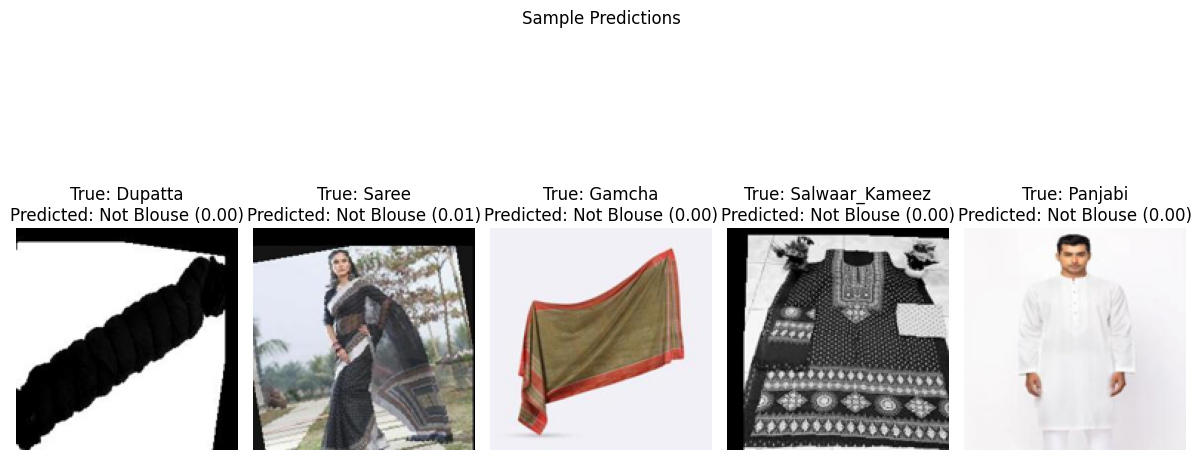

In [26]:
visualize_predictions(test_generator, model)

#Acknowledgements:

Anthony Therrien https://www.kaggle.com/code/anthonytherrien/dog-vs-cat-trainer/notebook